<a href="https://colab.research.google.com/github/fangyiyu/auto_mpg/blob/main/auto_mpg_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)

In [3]:
# read data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
# replace null values in horsepower with the average horsepower for the respective number of cylinders
dataset_copy = dataset.dropna()
dataset_copy.isna().sum()
AVG = np.sum(dataset_copy['Cylinders']*dataset_copy['Horsepower'])/np.sum(dataset_copy['Cylinders'])
MEAN = np.mean(dataset_copy['Cylinders'])
dataset.loc[pd.isnull(dataset.Horsepower), 'Horsepower'] = dataset.Cylinders*AVG/MEAN
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.262127,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.284091,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Split dataset to trainning de validation sets
train_dataset=dataset.sample(frac=0.5, random_state=0)
dev_dataset=dataset.drop(train_dataset.index)

In [7]:
# split features from labels
train_features = train_dataset.copy()
dev_features = dev_dataset.copy()

train_labels = train_features.pop('MPG')
dev_labels = dev_features.pop('MPG')

In [8]:
# each feature has different ranges, normalize into the same scale to make training more stable
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.722111,8.045346
Cylinders,5.452261,1.680693
Displacement,194.020101,105.510398
Horsepower,104.583411,39.958258
Weight,2966.457286,848.200708
Acceleration,15.701005,2.898327
Model Year,75.959799,3.750878
Origin,1.552764,0.801501


In [9]:
# normalization
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [10]:
# build model
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='sigmoid'),
      layers.Dense(64, activation='sigmoid'),
      layers.Dense(1)
  ])

  model.compile(optimizer='sgd',
              loss='mae',
              metrics=['mae'])
  return model

In [11]:
dnn_model = build_and_compile_model(normalizer)

In [12]:
# train the model
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=2, epochs=100)

Epoch 1/100
5/5 - 0s - loss: 24.6425 - mae: 24.6425 - val_loss: 22.8051 - val_mae: 22.8051
Epoch 2/100
5/5 - 0s - loss: 23.6791 - mae: 23.6791 - val_loss: 21.8434 - val_mae: 21.8434
Epoch 3/100
5/5 - 0s - loss: 22.7155 - mae: 22.7155 - val_loss: 20.8764 - val_mae: 20.8764
Epoch 4/100
5/5 - 0s - loss: 21.7433 - mae: 21.7433 - val_loss: 19.8959 - val_mae: 19.8959
Epoch 5/100
5/5 - 0s - loss: 20.7542 - mae: 20.7542 - val_loss: 18.8935 - val_mae: 18.8935
Epoch 6/100
5/5 - 0s - loss: 19.7401 - mae: 19.7401 - val_loss: 17.8614 - val_mae: 17.8614
Epoch 7/100
5/5 - 0s - loss: 18.6932 - mae: 18.6932 - val_loss: 16.7918 - val_mae: 16.7918
Epoch 8/100
5/5 - 0s - loss: 17.6059 - mae: 17.6059 - val_loss: 15.6774 - val_mae: 15.6774
Epoch 9/100
5/5 - 0s - loss: 16.4710 - mae: 16.4710 - val_loss: 14.5114 - val_mae: 14.5114
Epoch 10/100
5/5 - 0s - loss: 15.2821 - mae: 15.2821 - val_loss: 13.2876 - val_mae: 13.2876
Epoch 11/100
5/5 - 0s - loss: 14.0329 - mae: 14.0329 - val_loss: 12.0003 - val_mae: 12.00

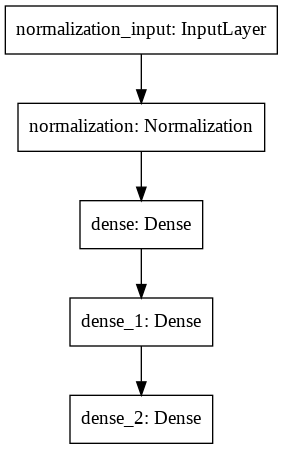

In [13]:
# display the model
tf.keras.utils.plot_model(dnn_model, to_file='fd.png')

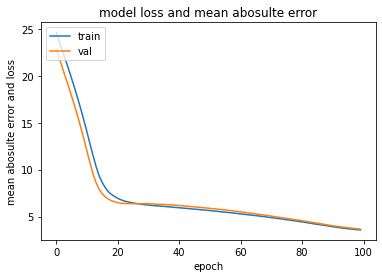

In [14]:
# plot the loss and accuracy of the model
def plot_model(history, name):
    #plt.plot(history.history['mae'])
    #plt.plot(history.history['val_mae'])
    #plt.title('mean abosulte error')
    #plt.xlabel('epoch')
   # plt.legend(['train', 'test'], loc='upper left')

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss and mean abosulte error')
    plt.ylabel('mean abosulte error and loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig(name)
    plt.show()

plot_model(history, 'd.png')

In [15]:
# optimize the model by adding kernal initializer, changing activation function, changing optimizer, and adding dropout layer
def build_optimized_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu', kernel_initializer='uniform'),
      layers.Dense(64, activation='relu', kernel_initializer='uniform'),
      layers.Dropout(0.2),
      layers.Dense(1)
  ])

  model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])
  return model

In [16]:
dnn_model_optimized = build_optimized_model(normalizer)

In [17]:
# run the optimized model
%%time
history_optimized = dnn_model_optimized.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=2, epochs=100)

Epoch 1/100
5/5 - 0s - loss: 23.9441 - mae: 23.9441 - val_loss: 22.6363 - val_mae: 22.6363
Epoch 2/100
5/5 - 0s - loss: 23.8479 - mae: 23.8479 - val_loss: 22.5248 - val_mae: 22.5248
Epoch 3/100
5/5 - 0s - loss: 23.7234 - mae: 23.7234 - val_loss: 22.3587 - val_mae: 22.3587
Epoch 4/100
5/5 - 0s - loss: 23.5315 - mae: 23.5315 - val_loss: 22.1130 - val_mae: 22.1130
Epoch 5/100
5/5 - 0s - loss: 23.2537 - mae: 23.2537 - val_loss: 21.7654 - val_mae: 21.7654
Epoch 6/100
5/5 - 0s - loss: 22.8639 - mae: 22.8639 - val_loss: 21.2897 - val_mae: 21.2897
Epoch 7/100
5/5 - 0s - loss: 22.3318 - mae: 22.3318 - val_loss: 20.6545 - val_mae: 20.6545
Epoch 8/100
5/5 - 0s - loss: 21.6349 - mae: 21.6349 - val_loss: 19.8360 - val_mae: 19.8360
Epoch 9/100
5/5 - 0s - loss: 20.7897 - mae: 20.7897 - val_loss: 18.8126 - val_mae: 18.8126
Epoch 10/100
5/5 - 0s - loss: 19.6409 - mae: 19.6409 - val_loss: 17.5314 - val_mae: 17.5314
Epoch 11/100
5/5 - 0s - loss: 18.2672 - mae: 18.2672 - val_loss: 15.9738 - val_mae: 15.97

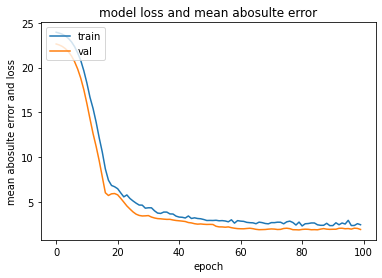

In [18]:
# plot the optimized model
plot_model(history_optimized, 'e.png')

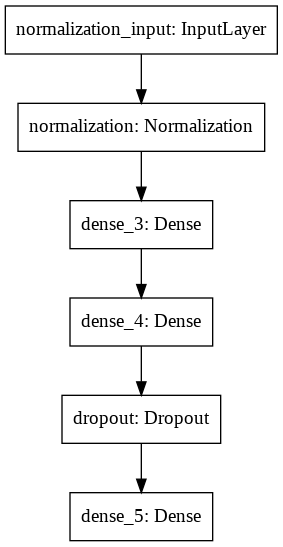

In [19]:
# display the optimized model
tf.keras.utils.plot_model(dnn_model_optimized , to_file='fe.png')